# Sentiment Analysis con KNN
## Clasificador en C++ 💪💪
Vamos a probar a nuestro bichito


Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [1]:
!cd .. && git submodule init
!cd .. && git submodule update
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: build: File exists
-- The C compiler identification is AppleClang 10.0.0.10001145
-- The CXX compiler identification is AppleClang 10.0.0.10001145
-- Check for working C compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/cc
-- Check for working C compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/c++
-- Check for working CXX compiler: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import sentiment


/Users/vpomsztein/Documents/PrivateRepositories/SentimentAnalysisMetNum/notebooks
Python 3.6.5 :: Anaconda, Inc.


In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd

!cd ../data && tar -xvf *.tgz

df = pd.read_csv("../data/imdb_small.csv", index_col=0)

print("Cantidad de documentos: {}".format(df.shape[0]))

x ./._imdb_small.csv
x imdb_small.csv
Cantidad de documentos: 12500


In [4]:
df.describe()

,type,review,label,file
count,12500,12500,12500,12500
unique,2,12469,2,12085
top,test,"I have always been a fan of Bottom, grabbing a...",neg,5304_10.txt
freq,6275,2,6322,2


In [5]:
text_train = df[df.type == 'train']["review"]
label_train = df[df.type == 'train']["label"]

text_test = df[df.type == 'test']["review"]
label_test = df[df.type == 'test']["label"]

#descomentar esto si se quiere tener un dataset más chico que los 6.000 totales
#text_train = text_train[:100]
#label_train = label_train[:100]

#text_test = text_test[:100]
#label_test = label_test[:100]

print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
print("Cantidad de instancias de test = {}".format(len(text_test)))


Cantidad de instancias de entrenamiento = 6225
Cantidad de instancias de test = 6275


In [6]:
from __future__ import division
print("Class balance : {} pos {} neg".format(
    (label_train == 'pos').sum() / label_train.shape[0], 
    (label_train == 'neg').sum() / label_train.shape[0]
))


Class balance : 0.49493975903614457 pos 0.5050602409638554 neg


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.85, min_df=0.01, max_features=50000)

vectorizer.fit(text_train)

X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values


In [8]:
import sentiment
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import calendar;
import time;

def f1score(prec, rec):
    f1 = 2*(prec*rec)/(prec+rec)
    return f1

def getMetrics(predictions, actualValues):
    tp = np.sum( np.logical_and(predictions == 1, actualValues == 1) )
    tn = np.sum( np.logical_and(predictions == 0, actualValues == 0) )
    fp = np.sum( np.logical_and(predictions == 1, actualValues == 0) )
    fn = np.sum( np.logical_and(predictions == 0, actualValues == 1) )

    acc = (tp + tn) / (tp+tn+fp+fn)
    if (tp + fp) == 0:
        #esto es que nunca predije que algo era positivo, o sea que nunca le pifié
        prec = 1
    else:
        prec = tp / (tp + fp)
    if (tp + fn) == 0:
        #esto es que no había positivos reales, o sea que "los agarré a todos"
        rec = 1
    else:
        rec = tp / (tp + fn)
    return acc, prec, rec

def saveData(filename, data):
    ts = calendar.timegm(time.gmtime())
    np.savetxt("{}_{}.csv".format(ts, filename), data, delimiter=",")
    
print("Done! You're a good boy 🐶")

Done! You're a good boy 🐶


In [ ]:
%%time

# Esta celda puede ser ejecutada sólo cuando se quiere probar PCA
pca = sentiment.PCA(50)
pca.fit(X_train)

In [ ]:

# Idem anterior!

pca_x_train = pca.transform(X_train)
pca_x_test = pca.transform(X_test)

In [ ]:
%%time

# Descomentar la implementación deseada:
# Uncomment this for KNN only (PCA disabled):
clf = sentiment.KNNClassifier(100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test[:500])
acc = accuracy_score(y_test[:500], y_pred[:500])

# Uncomment this for PCA enabled:
#clf = sentiment.KNNClassifier(550)
#clf.fit(pca_x_train, y_train)

#y_pred = clf.predict(pca_x_test)

#acc, prec, rec = getMetrics(y_pred, y_test)
#f1 = f1score(prec, rec)

print(acc, prec, rec, f1)

Finished 1
Finished 500
Finished 1000
Finished 1500
Finished 2000
Finished 2500
Finished 3000
Finished 3500
Finished 4000
Finished 4500
Finished 5000
Finished 5500
Finished 6000


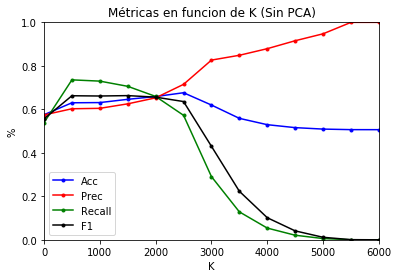

In [11]:
## ==================== Experimento 1 ========================
## Análisis de calidad de resultados en base a k y alpha

## Analizo la variación de las métricas en funcion de k

K_vals = np.arange(0,X_train.shape[0], 500)
K_vals[0] = 1
mets2 = np.zeros((len(K_vals), 4))
               
pca = sentiment.PCA(500)
pca.fit(X_train)
Xtc_train = pca.transform(X_train)
Xtc_test = pca.transform(X_test)
    
for i,k in enumerate(K_vals):
    clf = sentiment.KNNClassifier(k)
    clf.fit(Xtc_train, y_train)
    preds = clf.predict(Xtc_test)
    acc, prec, rec = getMetrics(preds, y_test)
    f1 = f1score(prec, rec)
    mets2[i] = [acc, prec, rec, f1]
    print("Finished {}".format(k))
    
saveData("KNN_1-6250_Alpha_500", mets2)
plt.plot(K_vals,mets2[:,0], 'b.-')
plt.plot(K_vals,mets2[:,1], 'r.-')
plt.plot(K_vals,mets2[:,2], 'g.-')
plt.plot(K_vals,mets2[:,3], 'k.-')
plt.title("Métricas en funcion de K (Alpha 500)")
plt.xlabel("K")
plt.ylabel("%")
plt.axis([1, K_vals[-1], 0, 1])
plt.gca().legend(('Acc','Prec','Recall','F1'))

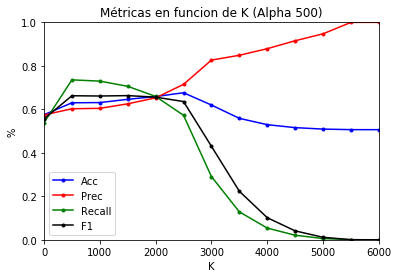

In [12]:
plt.plot(K_vals,mets2[:,0], 'b.-')
plt.plot(K_vals,mets2[:,1], 'r.-')
plt.plot(K_vals,mets2[:,2], 'g.-')
plt.plot(K_vals,mets2[:,3], 'k.-')
plt.title("Métricas en funcion de K (Alpha 500)")
plt.xlabel("K")
plt.ylabel("%")
plt.axis([1, K_vals[-1], 0, 1])
plt.gca().legend(('Acc','Prec','Recall','F1'))

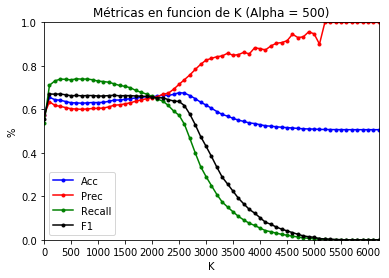

In [54]:
plt.plot(K_vals,mets[:,0], 'b.-')
plt.plot(K_vals,mets[:,1], 'r.-')
plt.plot(K_vals,mets[:,2], 'g.-')
plt.plot(K_vals,mets[:,3], 'k.-')
plt.title("Métricas en funcion de K (Alpha = 500)")
plt.xlabel("K")
plt.ylabel("%")
plt.axis([1, K_vals[-1], 0, 1])
plt.xticks(np.arange(0, K_vals[-1], 500.0))
plt.gca().legend(('Acc','Prec','Recall','F1'))

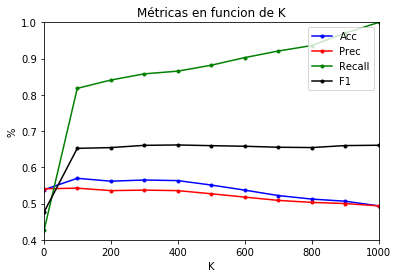

In [14]:
plt.plot(K_vals,mets[:,0], 'b.-')
plt.plot(K_vals,mets[:,1], 'r.-')
plt.plot(K_vals,mets[:,2], 'g.-')
plt.plot(K_vals,mets[:,3], 'k.-')
plt.title("Métricas en funcion de K")
plt.xlabel("K")
plt.ylabel("%")
plt.axis([1, K_vals[-1], 0.4, 1])
plt.gca().legend(('Acc','Prec','Recall','F1'), loc="upper right")
# plt.legend((mets[:,0], mets[:,1], mets[:,2], mets[:,3]), ("Acc", "Prec", "Rec", ""), loc="upper right")

In [11]:
## Analizo la variación de las métricas en funcion de alpha para K fijo

alphas = np.arange(0,1501,150)
alphas[0] = 1
K_vals_fixes = np.array([100,2000,2600])

dmets = { i : np.zeros((len(alphas), 4)) for i in K_vals_fixes}
dmets

{2000: array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])}

In [12]:
print("Beginning alpha metric calculations")

for i,a in enumerate(alphas):
    
    pca = sentiment.PCA(a)
    pca.fit(X_train)
    Xtc_train = pca.transform(X_train)
    Xtc_test = pca.transform(X_test)
    print("Finished training PCA {}".format(a))

    for j, k in enumerate(K_vals_fixes):
        clf = sentiment.KNNClassifier(k)
        clf.fit(Xtc_train, y_train)
        preds = clf.predict(Xtc_test)
        acc, prec, rec = getMetrics(preds, y_test)
        f1 = f1score(prec,rec)
        mets = dmets[k]
        mets[i] = [acc, prec, rec, f1]
        print("Finished {}, alpha = {}".format(k, a))


## Metricas para PCA:

saveData("Alpha_1-150_K_1-2000-2600", mets)

line_styles = ['b.-', 'r.-', 'g.-', 'k.-', 'y.-', 'm.-']
for j,k in enumerate(K_vals_fixes):
    mets = dmets[k]

    plt.subplot(4, 1, 1)
    plt.title("Métricas en funcion de Alpha")
    plt.plot(alphas,mets[:,0], line_styles[j])
    plt.axis([1, alphas[-1], 0, 1])
    plt.ylabel("Acc")
    plt.xticks([])

    plt.subplot(4, 1, 2)
    plt.plot(alphas,mets[:,1], line_styles[j])
    plt.axis([1, alphas[-1], 0, 1])
    plt.ylabel("Prec")
    plt.xticks([])
    
    plt.subplot(4, 1, 3)
    plt.plot(alphas,mets[:,2], line_styles[j])
    plt.axis([1, alphas[-1], 0, 1])
    plt.ylabel("Rec")
    plt.xticks([])
    
    plt.subplot(4, 1, 4)
    plt.plot(alphas,mets[:,3], line_styles[j])
    plt.axis([1, alphas[-1], 0, 1])
    plt.ylabel("F1")
    plt.xticks([])

plt.xlabel("Alpha")
plt.xticks(alphas)
plt.axis([1, alphas[-1], 0, 1])
plt.gca().legend([str(i) for i in K_vals_fixes], loc=(1.04,0))

Beginning alpha metric calculations
Finished training PCA 1
Finished 2000, alpha = 1
Finished training PCA 15
Finished 2000, alpha = 15
Finished training PCA 30
Finished 2000, alpha = 30
Finished training PCA 45
Finished 2000, alpha = 45
Finished training PCA 60
Finished 2000, alpha = 60
Finished training PCA 75
Finished 2000, alpha = 75
Finished training PCA 90
Finished 2000, alpha = 90
Finished training PCA 105
Finished 2000, alpha = 105
Finished training PCA 120
Finished 2000, alpha = 120
Finished training PCA 135
Finished 2000, alpha = 135


NameError: name 'K_vals' is not defined

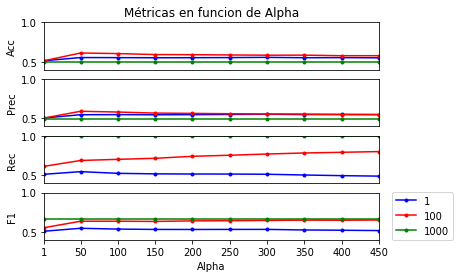

In [39]:
line_styles = ['b.-', 'r.-', 'g.-', 'k.-', 'y.-', 'm.-']
for j,k in enumerate(K_vals_fixes):
    mets = dmets[k]

    plt.subplot(4, 1, 1)
    plt.title("Métricas en funcion de Alpha")
    plt.plot(alphas,mets[:,0], line_styles[j])
    plt.axis([1, alphas[-1], 0.4, 1])
    plt.ylabel("Acc")
    plt.xticks([])

    plt.subplot(4, 1, 2)
    plt.plot(alphas,mets[:,1], line_styles[j])
    plt.axis([1, alphas[-1], 0.4, 1])
    plt.ylabel("Prec")
    plt.xticks([])
    
    plt.subplot(4, 1, 3)
    plt.plot(alphas,mets[:,2], line_styles[j])
    plt.axis([1, alphas[-1], 0.4, 1])
    plt.ylabel("Rec")
    plt.xticks([])
    
    plt.subplot(4, 1, 4)
    plt.plot(alphas,mets[:,3], line_styles[j])
    plt.axis([1, alphas[-1], 0.4, 1])
    plt.ylabel("F1")
    plt.xticks([])


plt.xlabel("Alpha")
plt.xticks(alphas)
plt.axis([1, alphas[-1], 0.4, 1])
plt.gca().legend([str(i) for i in K_vals_fixes], loc=(1.04,0))

In [ ]:
a = np.random.random((1200, 500))

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-1, 1200), np.linspace(1, 500))

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

# plt.show()

# plt.imshow(a, cmap='hot', interpolation='nearest')
# plt.show()
dmets
y

In [ ]:
for i in range(15, 0, -1): # <--Delete me
    print(i)
    pca = sentiment.PCA(min(i, 50))
    pca.fit(X_train[:i])
    Xtc_train = pca.transform(X_train[:i])
    Ytc_train = y_train[:i]
    Xtc_test = pca.transform(X_test)
    
    for k in range(min(i, 50), 0, -1): # <--Delete me
        clf = sentiment.KNNClassifier(k)

In [ ]:
trainSizeRange = range(X_train.shape[0], 0, -120)
trainSizeRangeLength = len(trainSizeRange)
knnRange = range(2500, 0, -50)
knnRangeLength = len(knnRange)

print("Will have {} trainSize instances".format(trainSizeRangeLength))
print("Will have {} knn instances".format(knnRangeLength))

accColorMap = np.zeros(shape=(trainSizeRangeLength, len(knnRange)))
precColorMap = np.zeros(shape=(trainSizeRangeLength, len(knnRange)))
recColorMap = np.zeros(shape=(trainSizeRangeLength, len(knnRange)))

for i in range(0, len(trainSizeRange)):
    trainSize = trainSizeRange[i]
    pca = sentiment.PCA(min(i, 50))
    pca.fit(X_train[:trainSize])
    Xtc_train = pca.transform(X_train[:trainSize])
    Ytc_train = y_train[:trainSize]
    Xtc_test = pca.transform(X_test)
    print("Finished training PCA train_size = {}".format(trainSize))

    for j in range(0, knnRangeLength):
        k = knnRange[j]
        if (k <= trainSize):
            clf = sentiment.KNNClassifier(k)
            clf.fit(Xtc_train, Ytc_train)
            preds = clf.predict(Xtc_test)
            acc, prec, rec = getMetrics(preds, y_test)
            f1 = f1score(prec,rec)
            accColorMap[trainSizeRangeLength - i - 1, knnRangeLength - j - 1] = acc
            precColorMap[trainSizeRangeLength - i - 1, knnRangeLength - j - 1] = prec
            recColorMap[trainSizeRangeLength - i - 1, knnRangeLength - j - 1] = rec
            f1ColorMap[trainSizeRangeLength - i - 1, knnRangeLength - j - 1] = f1
            print("Finished k = {}, train_size = {}".format(k, trainSize))
        else:
            accColorMap[trainSizeRangeLength - i - 1, knnRangeLength - j - 1] = 0
            precColorMap[trainSizeRangeLength - i - 1, knnRangeLength - j - 1] = 0
            recColorMap[trainSizeRangeLength - i - 1, knnRangeLength - j - 1] = 0
            f1ColorMap[trainSizeRangeLength - i - 1, knnRangeLength - j - 1] = 0

saveData("accColorMap", accColorMap)
saveData("precColorMap", precColorMap)
saveData("recColorMap", recColorMap)
saveData("f1ColorMap", f1ColorMap)
        
fig, ax = plt.subplots()

c = ax.pcolormesh(accColorMap, cmap='hot')
ax.set_title('Train_size vs neighbors')
# set the limits of the plot to the limits of the data
ax.axis([0, accColorMap.shape[1], 0, accColorMap.shape[0]])
fig.colorbar(c, ax=ax)

fig2, ax2 = plt.subplots()

c2 = ax2.pcolormesh(precColorMap, cmap='hot')
ax2.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax2.axis([0, precColorMap.shape[1], 0, precColorMap.shape[0]])
fig2.colorbar(c2, ax=ax2)

fig3, ax3 = plt.subplots()

c3 = ax3.pcolormesh(recColorMap, cmap='hot')
ax3.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax3.axis([0, recColorMap.shape[1], 0, recColorMap.shape[0]])
fig3.colorbar(c3, ax=ax3)

fig4, ax4 = plt.subplots()

c4 = ax4.pcolormesh(f1ColorMap, cmap='hot')
ax4.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax4.axis([0, f1ColorMap.shape[1], 0, f1ColorMap.shape[0]])
fig4.colorbar(c4, ax=ax4)

plt.show()

In [ ]:
# fig, ax = plt.subplots()

c = ax.pcolormesh(accColorMap, cmap='hot', vmin=0, vmax=1)
ax.set_title('Train_size vs neighbors (accuracy)')
# set the limits of the plot to the limits of the data
ax.axis([0, accColorMap.shape[1], 0, accColorMap.shape[0]])
ax.set_xlabel("Train size (1:125)")
ax.set_ylabel("K neighbors (1:50)")
fig.colorbar(c, ax=ax)

fig2, ax2 = plt.subplots()

c2 = ax2.pcolormesh(precColorMap, cmap='hot', vmin=0, vmax=1)
ax2.set_title('Train_size vs neighbors (precision)')
# set the limits of the plot to the limits of the data
ax2.axis([0, precColorMap.shape[1], 0, precColorMap.shape[0]])
ax2.set_xlabel("Train size (1:125)")
ax2.set_ylabel("K neighbors (1:50)")
fig2.colorbar(c2, ax=ax2)

fig3, ax3 = plt.subplots()

c3 = ax3.pcolormesh(recColorMap, cmap='hot', vmin=0, vmax=1)
ax3.set_title('Train_size vs neighbors (recall)')
# set the limits of the plot to the limits of the data
ax3.axis([0, recColorMap.shape[1], 0, recColorMap.shape[0]])
ax3.set_xlabel("Train size (1:125)")
ax3.set_ylabel("K neighbors (1:50)")
fig3.colorbar(c3, ax=ax3)

fig3, ax3 = plt.subplots()

c4 = ax4.pcolormesh(f1ColorMap, cmap='hot', vmin=0, vmax=1)
ax4.set_title('Train_size vs neighbors (f1)')
# set the limits of the plot to the limits of the data
ax4.axis([0, f1ColorMap.shape[1], 0, f1ColorMap.shape[0]])
ax4.set_xlabel("Train size (1:125)")
ax4.set_ylabel("K neighbors (1:50)")
fig4.colorbar(c4, ax=ax4)

plt.show()